<a href="https://colab.research.google.com/github/petron23/ML_random_projects/blob/main/MNIST_classification_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18564668.20it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 300255.84it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5634615.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5414312.18it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [15]:
print(train_data.classes, train_data.transforms, train_data.targets, len(train_data.data), len(train_data.targets))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] StandardTransform
Transform: ToTensor() tensor([9, 0, 0,  ..., 3, 0, 5]) 60000 60000


In [16]:
image, label = train_data[0]
print(image.shape)
print(label)

torch.Size([1, 28, 28])
9


Image shape: torch.Size([1, 28, 28])


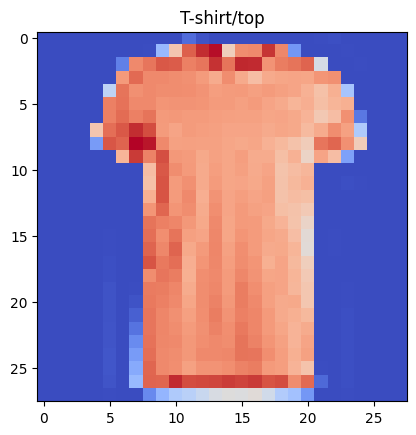

In [12]:
image, label = train_data[17]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap = "coolwarm")
plt.title(train_data.classes[label]);

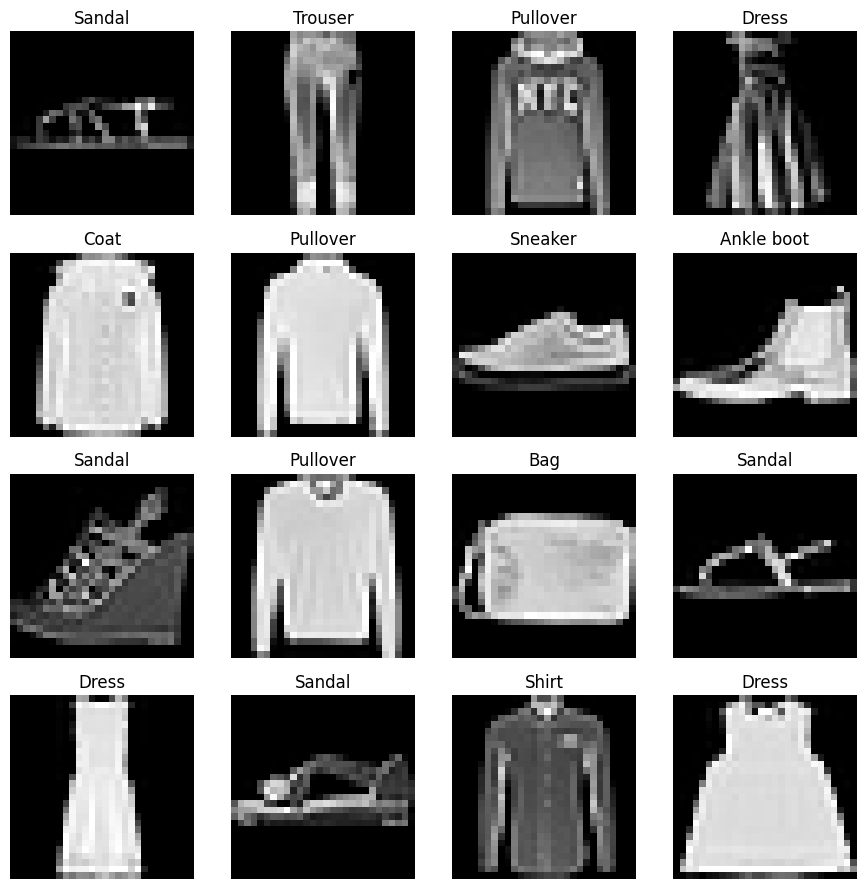

In [14]:
import random

torch.manual_seed(42)

fig, axs = plt.subplots(4, 4, figsize=(9, 9))

for ax in axs.flat:
    random_idx = random.randint(0, len(train_data) - 1)
    img, label = train_data[random_idx]

    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(train_data.classes[label])
    ax.axis('off')

plt.tight_layout()
